# Creating Weibull Probability Plot with Complete Failure Data

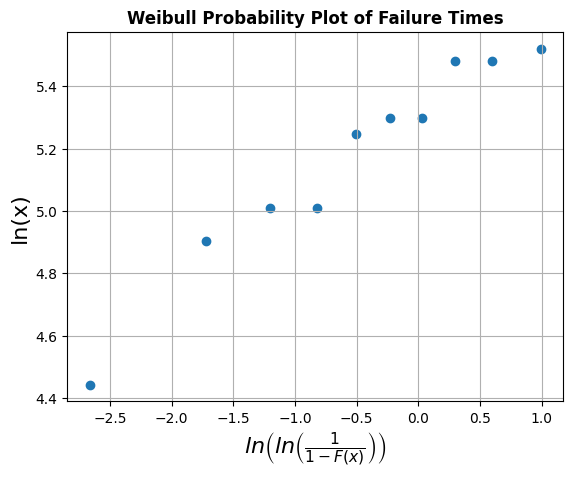

x and y coordinates of the Weibull probability plot:
( -2.6638430853881676 , 4.442651256490317 )
( -1.7232631502768931 , 4.90527477843843 )
( -1.2020231152465504 , 5.0106352940962555 )
( -0.8216665151286872 , 5.0106352940962555 )
( -0.5085953937341485 , 5.247024072160486 )
( -0.23036544473331988 , 5.298317366548036 )
( 0.03292496191433932 , 5.298317366548036 )
( 0.29903293186204805 , 5.480638923341991 )
( 0.5939772166603856 , 5.480638923341991 )
( 0.9926889294902709 , 5.521460917862246 )


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln

data = np.array([85,135,150,150,190,200,200,240,240,250])
y = ln(data)
rank = np.arange(1,data.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
x = ln(-ln(1 - median_rank))

plt.scatter(x,y)
plt.title("Weibull Probability Plot of Failure Times", weight='bold')
plt.xlabel(r'$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$', fontsize=16)
plt.ylabel('ln(x)', fontsize=16)
plt.grid()
plt.show()

print("x and y coordinates of the Weibull probability plot:")
for value in zip(x,y):
    print("( " + str(value[0]) + " , " + str(value[1]) + " )")

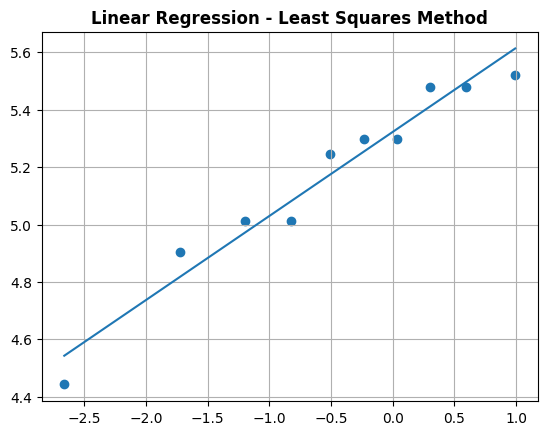

r^2 value: 0.9539028603991179
slope/shape parameter: 3.4159509180911036
scale parameter: 204.93601772144896


In [2]:


import scipy.stats as stats # scipy is a statistical package for Python
import math

# Use Scipy's stats package to perform least-squares fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.scatter(x,y)
plt.plot(x,line)
plt.title("Linear Regression - Least Squares Method", weight='bold')
plt.grid()
plt.show()

# Since we plot failure times on the y-axis, the actual slope is inverted
shape = 1/slope
# Since we plot failure times on the y-axis, we want the x-intercept, not the y-intercept
# x-intercept is equal to the negative y-intercept divided by the slope/shape parameter
# Basically you are solving for x: 0 = mx + b, equation of the line where y = 0
x_intercept = - intercept / shape

print("r^2 value:", r_value**2)
print("slope/shape parameter:", shape)
scale = math.exp(-x_intercept/slope)
print("scale parameter:", scale)

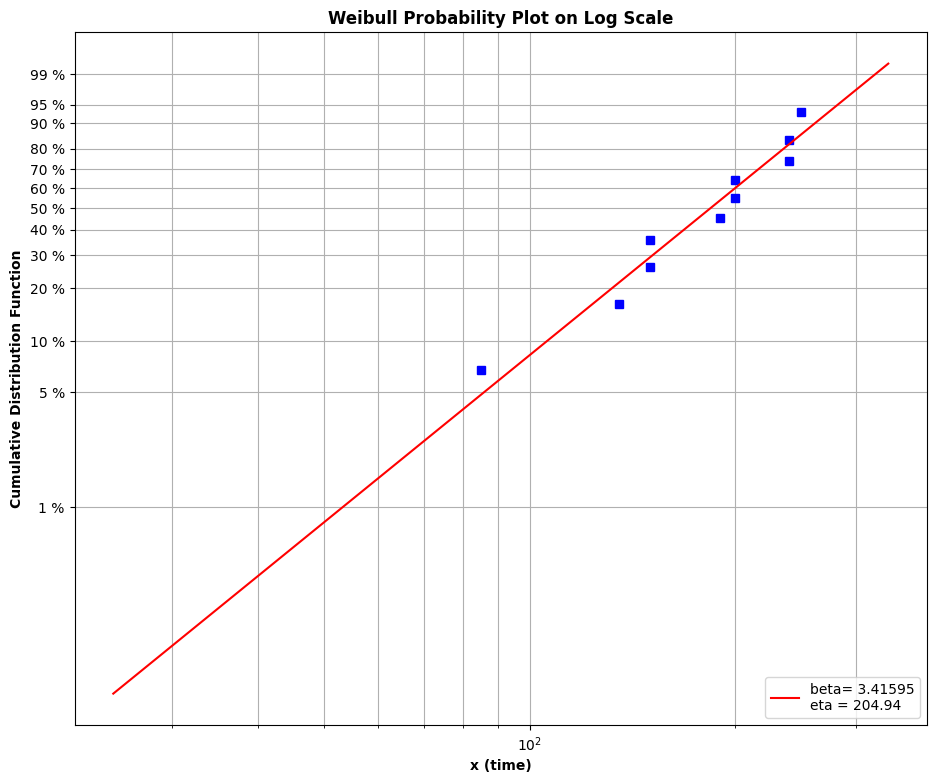

In [3]:
import numpy as np
from numpy import random
from matplotlib.ticker import FuncFormatter

# I'm used to  the ln notation for the natural log
from numpy import log as ln

# Since we are going to plot failure times on log scale, we don't need to take the log of the failure times
x = data
rank = np.arange(1,x.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
y = ln(-ln(1 - median_rank))

# Generate 1000 numbers following a Weibull distribution that we think ideally fits our data using the shape and scale parameter
x_ideal = scale *random.weibull(shape, size=100)
x_ideal.sort()
F = 1 - np.exp( -(x_ideal/scale)**shape )
y_ideal = ln(-ln(1 - F))

# Weibull plot
fig1 = plt.figure()
fig1.set_size_inches(11,9)
ax = plt.subplot(111)
plt.semilogx(x, y, "bs")
plt.semilogx(x_ideal, y_ideal, 'r-', label="beta= %5G\neta = %.5G" % (shape, scale) )
plt.title("Weibull Probability Plot on Log Scale", weight="bold")
plt.xlabel('x (time)', weight="bold")
plt.ylabel('Cumulative Distribution Function', weight="bold")
plt.legend(loc='lower right')

# Generate ticks
def weibull_CDF(y, pos):
    return "%G %%" % (100*(1-np.exp(-np.exp(y))))

formatter = FuncFormatter(weibull_CDF)
ax.yaxis.set_major_formatter(formatter)

yt_F = np.array([ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
           0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
yt_lnF = ln( -ln(1-yt_F))
plt.yticks(yt_lnF)
ax.yaxis.grid()
ax.xaxis.grid(which='both')
plt.show()